In [1]:
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler

from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
cloud_data = pd.read_csv("C:/Users/bened/Documents/University Files/SchoenStats/PyTorch Working Directory/DreamyDatasets/3D_two_clouds.csv")
cloud_data.info()

# random sample from dataset
X = cloud_data.sample(1000).reset_index(drop=True)
X_train = torch.tensor(X.values)
X = cloud_data.sample(200).reset_index(drop=True)
X_test = torch.tensor(X.values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       20000 non-null  float64
 1   y       20000 non-null  float64
 2   z       20000 non-null  float64
dtypes: float64(3)
memory usage: 468.9 KB


Text(0.5, 1.0, 'Two Clouds Training Distribution')

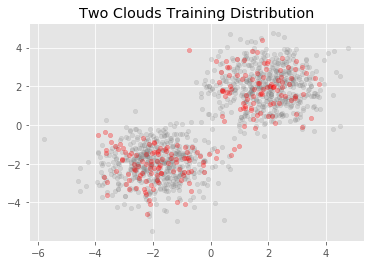

In [3]:
cloud_data.info()
plt.scatter(X_train[:,0], X_train[:,1], alpha=0.2, s=20, label='development', color='grey')
plt.scatter(X_test[:,0], X_test[:,1], alpha=0.3, s=20, label='validation', color='red')
plt.title("Two Clouds Training Distribution")


In [4]:
# define the neural network class
class LinRegr(nn.Module):

    def __init__(self, in_features, n1_hidden, out_features):
        super(LinRegr, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(in_features, n1_hidden),
            nn.PReLU(),
            nn.Linear(n1_hidden, out_features),
            nn.PReLU())
    
    def forward(self, x):
        out = self.layer1(x)
        return out

net = LinRegr(in_features=1, n1_hidden=3, out_features=1)
optimizer = torch.optim.SGD(net.parameters(), lr=0.1, weight_decay=0.01)
loss = nn.MSELoss()

In [5]:
# epoch time
num_epoch = 1000
batch_size = 64

net=net.double()
loss_list = []

for epoch in tqdm(range(num_epoch)):
    permu = torch.randperm(X_train.shape[0])
    
    for i in range(0, X_train.shape[0], batch_size):
        indices = permu[i:i+batch_size]
        batch_x, batch_y = X_train[indices,0], X_train[indices,1]
        t = net.forward(batch_x.unsqueeze(1))
        optimizer.zero_grad()
        l = loss(t, batch_y.unsqueeze(1))
        l.backward()
        optimizer.step()

    if epoch % 100 == 0:
        loss_list.append(l.detach())
        
loss_list

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 122.08it/s]


[tensor(1.6998, dtype=torch.float64),
 tensor(1.5634, dtype=torch.float64),
 tensor(1.9872, dtype=torch.float64),
 tensor(1.8454, dtype=torch.float64),
 tensor(1.3452, dtype=torch.float64),
 tensor(1.3519, dtype=torch.float64),
 tensor(2.4143, dtype=torch.float64),
 tensor(1.9225, dtype=torch.float64),
 tensor(1.5598, dtype=torch.float64),
 tensor(1.7873, dtype=torch.float64)]

In [6]:
num_samples = 200
res = torch.empty(0)
for i in range(num_samples):
    k = net(X_test[i:i+1,0]).detach()
    res = torch.cat((res, k), 0)

In [7]:
import numpy as np
x0 = X_test[:,0]
x1 = X_test[:,1]
y1 = res
results = pd.DataFrame(np.array(torch.stack((x0, x1, y1))).T, columns=('x', 't', 't_pred'))

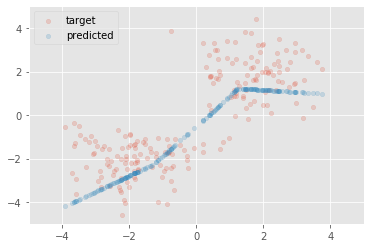

In [8]:
plt.scatter(results['x'], results['t'], alpha=0.2, s=20, label='target')
plt.scatter(results['x'], results['t_pred'], alpha=0.2, s=20, label='predicted')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.legend(loc='upper left')